# 딥러닝으로 MNIST 손글씨 인식하기 

## MNIST 손글씨 데이타 세트

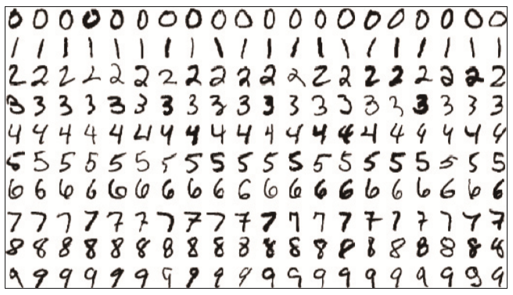

- MNIST 데이터셋은 미국 국립표준기술원(NIST)이 고등학생과 인구조사국 직원등이 쓴 손글씨를 이용해 만든 데이터로 구성
- 총 70,000개(60,000개 학습 데이타, 10,000개의 테스트 데이타)의 글자 이미지로 구성
- 숫자 이미지(28x28)와 각 이미지에 해당하는 레이블(0부터 9까지) 이루어짐
- 딥러닝을 배우는 사람이라면 자신의 알고리즘과 다른 알고리즘의 성과를 비교해 보고자 한 번씩 도전해 보는 가장 유명한 데이터 중 하나

## 딥러닝 기술로 MNIST 글씨 인식하기

### 텐서플로우와 케라스 라이브러리 import 및 버전 확인

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


### 1. MNIST 데이타 불러오기
- 케라스를 이용해 mnist.load_ data() 함수로 사용할 데이터를 불러옴

In [2]:
from keras.datasets import mnist

print(type(mnist.load_data()))
print(mnist.load_data())
# train data, train class, test data, test class

11501568/11490434 [==============================] - 0s 0us/step
<class 'tuple'>
((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, .

### 2. 속성과 클래스, 학습 데이타와 테스트 데이타로 구분하기

- 속성과 클래스 구분
    - 불러온 이미지 데이터를 X로, 이 이미지에 0~9까지 붙인 이름표를 Y_class로 구분하여 명명하겠음
    - 70,000개 중 학습에 사용될 부분은 train으로, 테스트에 사용될 부분은 test라는 이름으로 불러옴
- 학습 데이타와 테스트 데이타 구분
    - 학습에 사용될 부분: x_train, y_train
    - 테스트에 사용될 부분: x_test, y_test

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape, y_train.shape)
print(y_train)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]


In [5]:
print(x_test.shape, y_test.shape)
print(y_test)

(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


In [6]:
print("학습셋 이미지 수 : %d 개" % (x_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (x_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


### 3. 데이타 형태 확인하기
### 3.1 그래프로 데이타 확인하기
- matplotlib 라이브러리의 imshow() 함수를 이용해 이미지를 출력
- 모든 이미지가 x_train에 저장되어 있으므로 x_train[0]을 통해 첫 번째 이미지를 출력

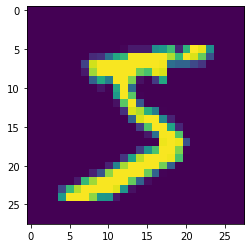

In [7]:
# 그래프로 확인
import matplotlib.pyplot as plt

plt.imshow(x_train[0]) # 칼라 출력
plt.show()

- cmap = 'Greys' 옵션을 지정해 흑백으로 출력

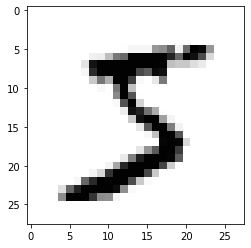

In [8]:
# 그래프로 확인 - 흑백
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='Greys') # 흑백 출력
plt.show()

### 3.2 코드로 확인하기
- 이미지는 가로 28 × 세로 28 = 총 784개의 픽셀로 이루어져 있음
- 각 픽셀은 밝기 정도에 따라 0부터 255까지 의 등급을 매김
- 흰색 배경이 0, 글씨가 들어간 곳은 1~255까지 숫자 중 하나로 채워져 긴 행렬로 이루어진 하나의 집합으로 변환

In [9]:
# 코드로 확인
import sys

for x in x_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


### 4. 검증 데이타 만들기
- sklearn 패키지의 train_test_split() 함수 이용하여 train 데이타를 train 데이타와 validation 데이타로 구분
- train data : validation data = 70 : 30

In [10]:
from sklearn.model_selection import train_test_split

# 학습 데이타/검증 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, 
                                                  random_state=42)

print(f'학습 데이타 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이타 {x_val.shape} 레이블 {y_val.shape}')

학습 데이타 (42000, 28, 28) 레이블 (42000,)
검증 데이타 (18000, 28, 28) 레이블 (18000,)


### 5. 데이타 전처리

### (1) 차원 변환
- Dense 층에 데이타를 입력하기 위해서 2차원 배열로 이루어진 숫자 이미지 데이터를 1차원 배열로 변환해야 함
- 주어진 가로 28 * 세로 28의 2차원 배열 => 784개의 1차원 배열로 차원 변환
- 차원 변환 위해 reshape() 함수 사용 => reshape(총 샘플 수, 1차원 속성의 수) 형식으로 지정
- reshape(x_train.shape[0], 784)

### (2) 정규화(normalization)
- 케라스는 데이터를 0에서 1 사이의 값으로 변환한 다음 구동할 때 최적의 성능을 보임
- 0 ~ 255 사이의 값으로 이루어진 값을 0~1 사이의 값으로 바꿔야 함
- 숫자 이미지 데이타는 각 픽셀 값이 0~255의 범위 이므로 255로 나누어서 전처리
- 이렇게 데이터의 폭이 클 때 적절한 값으로 분산의 정도를 바꾸는 과정을 데이터 정규화(normalization)라고 함

In [11]:
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

42000
18000
10000


In [18]:
# 1) 2차원 -> 1차원 변환 과정
# 1) (2차원 -> 1차원 변환 과정)/28*28
x_train = (x_train.reshape(x_train.shape[0], 28*28)) / 255
x_val = (x_val.reshape(x_val.shape[0], 28*28)) / 255
x_test = (x_test.reshape(x_test.shape[0], 28*28)) / 255

In [19]:
print(x_train.shape)

(42000, 784)


In [21]:
# x_train[:1]

### 5. 레이블 전처리
- 모델의 마지막 층에서 소프트맥스(softmax) 함수를 이용하기 때문에 레이블을 범주형 데이타로 변환
- 원핫인코딩(one-hot encoding) : 레이블 값을 0~9까지의 정수형 값을 갖는 형태를 0 또는 1로만 이루어진 벡터로 값으로 수정
  - (예) class가 5이면 => [0,0,0,0,1,0,0,0,0,0] 으로 변환
- 케라스의 np_utils.to_categorical() 함수 사용하여 원핫 인코딩 진행
  - to_categorical(클래스, 클래스의 개수)   (예) to_categorical(y_test)

In [22]:
# 레이블의 원-핫 인코딩 과정
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---
## MNIST 글씨 인식 딥러닝(Simple Deep Learning) 실습

### 은닉층이 하나인 딥러닝 과정 도식화

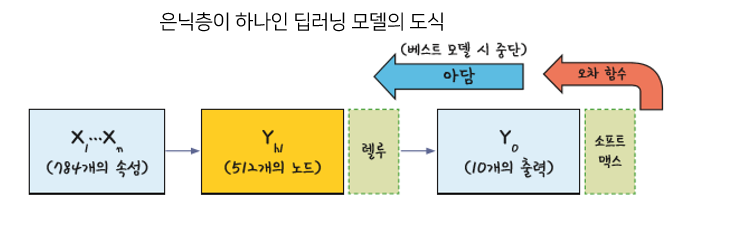

### 1. 데이타 불러오기, 학습/검증/테스트 데이타셋 분리, 설명 데이타 정규화, 레이블 원-핫인코딩


In [23]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

# 데이타 불러오기 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 학습 데이타/검증 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, 
                                                  random_state=42)
# 설명 데이타 1차원 변형, 정규화
x_train = (x_train.reshape(x_train.shape[0], 28*28)) / 255
x_val = (x_val.reshape(x_val.shape[0], 28*28)) / 255
x_test = (x_test.reshape(x_test.shape[0], 28*28)) / 255

# 레이블 원핫 인코딩
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 2. 딥러닝 모델 구성하기(simple deep learning)
- 입력 값(input_dim) : 784
- 은닉층 : 64
- 출력층 : 10
- 활성화 함수 : 은닉층-relu, 출력층-softmax

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 모델 구성하기
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력층 - 28*28=728개 노드, 은닉층 - 64개 노드
model.add(Dense(10, activation='softmax'))             # 출력층 - 10개 노드

#### 모델 요약하기

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


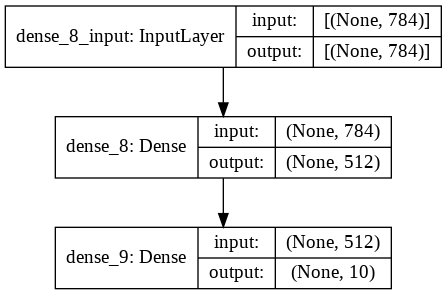

In [46]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

### 3. 모델 컴파일
- 오차 함수: categorical_crossentropy
- 최적화 함수: adam, adam 옵티마이저의 기본 학습률은 0.001이 디폴트값

In [47]:
# 모델 컴파일 - 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', # 손실 함수
              optimizer='adam',                # 최적화 함수
              metrics=['accuracy'])            # 모니터링할 평가 지표

### 4. 모델 학습하기

In [48]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.3205 - accuracy: 0.9097 - val_loss: 0.1734 - val_accuracy: 0.9503
Epoch 2/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1339 - accuracy: 0.9610 - val_loss: 0.1238 - val_accuracy: 0.9643
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.0868 - accuracy: 0.9756 - val_loss: 0.0985 - val_accuracy: 0.9727
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.0614 - accuracy: 0.9824 - val_loss: 0.0941 - val_accuracy: 0.9726
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.0461 - accuracy: 0.9869 - val_loss: 0.0860 - val_accuracy: 0.9747
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 7/30
329/329 [==============================] - 2s 7ms/step - loss: 0.0246 - accuracy: 0.9936 - val_loss: 0.0824 - val_accuracy: 0.9771
Epoch 

### 5. 학습 결과 그래프로 표시하기

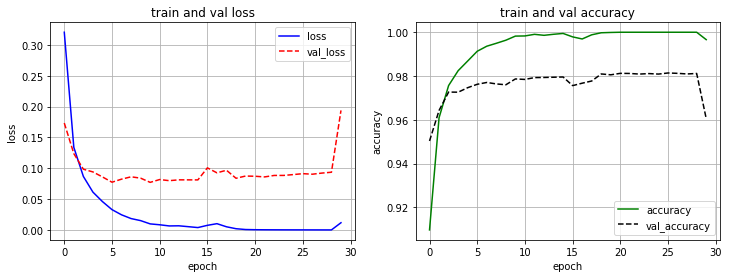

In [62]:
# 학습 결과 그래프로 표시하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# train and val loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.plot(history.history['val_loss'], 'r--', label='val_loss')

ax1.legend()
ax1.grid()
ax1.set_title('train and val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

# train and val accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], 'g-', label='accuracy')
ax2.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

ax2.legend()
ax2.grid()
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.show()

### 6. 모델 평가하기
- model.evaluate() 함수
  - 첫번째 값은 손실값, 두번째 값은 정확도를 리턴

In [65]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.9637


[0.15530739724636078, 0.963699996471405]

### 7. 모델을 이용한 예측하기
- model.predict() 함수

In [82]:
import numpy as np 

results = model.predict(x_test)
print(results.shape)

np.set_printoptions(precision=7) # numpy의 소수점 제한 사용
print(f'각 클래스에 속할 확률 : \n{results[0]}')
print(f'예측 값 : {np.argmax(results, axis=-1)[0]}')

(10000, 10)
각 클래스에 속할 확률 : 
[4.6370054e-08 2.6529920e-13 2.6430790e-08 1.4638429e-08 2.4910765e-13
 1.2827784e-09 5.5425770e-15 9.9996185e-01 2.0332576e-10 3.8083817e-05]
예측 값 : 7


- 예측값을 그림으로 확인하기

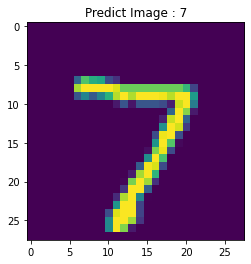

In [80]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis=-1)
plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predict Image : ' + str(arg_results[0]))
plt.show()

### 8. 모델 평가 방법 1 - 혼동 행렬

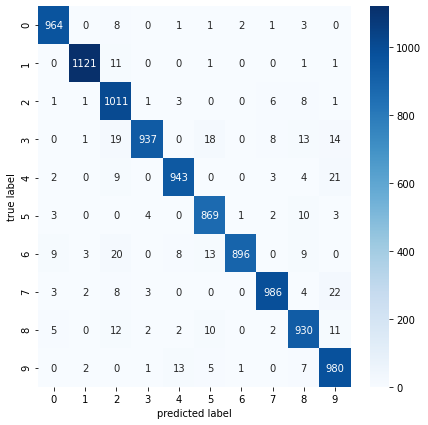

In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬 만들기
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(results, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


### 8. 모델 평가 방법 2 - 분류 보고서

In [91]:
print('\n',  classification_report(np.argmax(y_test, axis=-1),
                                 np.argmax(results, axis=-1)))


               precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.92      0.98      0.95      1032
           3       0.99      0.93      0.96      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.97      0.96       892
           6       1.00      0.94      0.96       958
           7       0.98      0.96      0.97      1028
           8       0.94      0.95      0.95       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



### 전체 코드(Simple Deep Learning)

In [ ]:
from keras.datasets import mnist

# 데이타 불러오기 - 학습/테스트 데이타셋
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 검증 데이타셋 만들기
from sklearn.model_selection import train_test_split

# 학습 데이타/검증 데이터를 0.7/0.3의 비율로 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size=0.3, 
                                                  random_state=42)

# 설명 데이타 정규화
x_train = (x_train.reshape(x_train.shape[0], 28*28)) / 255
x_val = (x_val.reshape(x_val.shape[0], 28*28)) / 255
x_test = (x_test.reshape(x_test.shape[0], 28*28)) / 255


# 레이블의 원-핫 인코딩
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 딥러닝 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 모델 구성하기
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu')) # 입력층 - 28*28=728개 노드, 은닉층 - 64개 노드
model.add(Dense(10, activation='softmax'))             # 출력층 - 10개 노드

# 모델 컴파일 - 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', # 손실 함수
              optimizer='adam',                # 최적화 함수
              metrics=['accuracy'])            # 모니터링할 평가 지표

# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_val, y_val))   

# 학습 결과 그래프로 표시하기
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# train and val loss
ax1 = plt.subplot(1, 2, 1)
ax1.plot(history.history['loss'], 'b-', label='loss')
ax1.plot(history.history['val_loss'], 'r--', label='val_loss')

ax1.legend()
ax1.grid()
ax1.set_title('train and val loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

# train and val accuracy
ax2 = plt.subplot(1, 2, 2)
ax2.plot(history.history['accuracy'], 'g-', label='accuracy')
ax2.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')

ax2.legend()
ax2.grid()
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')

plt.show()           